In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [3]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data",)

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
data.rename({'ID#':'Id',"Award?":"Award"},axis=1,inplace="True")


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [9]:
data.isnull().sum()

Id                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
data.corr()

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


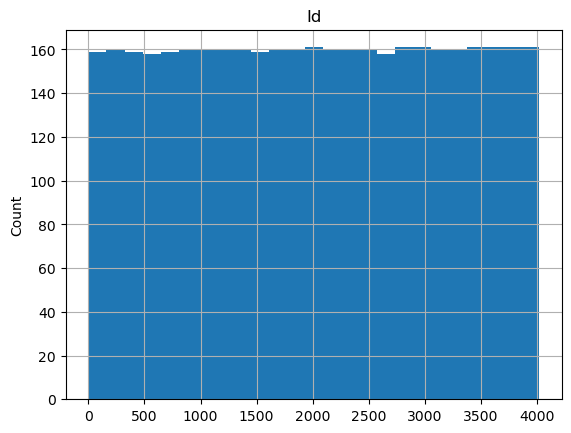

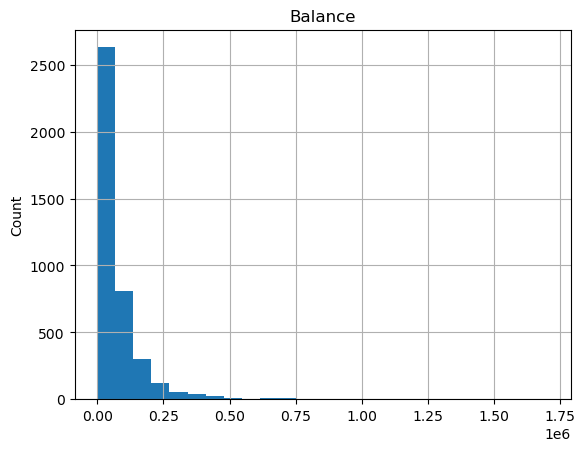

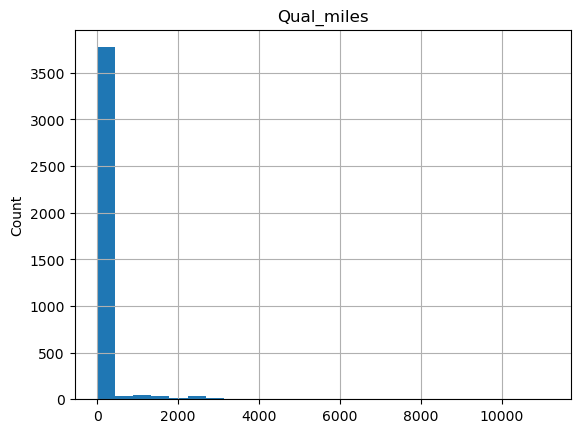

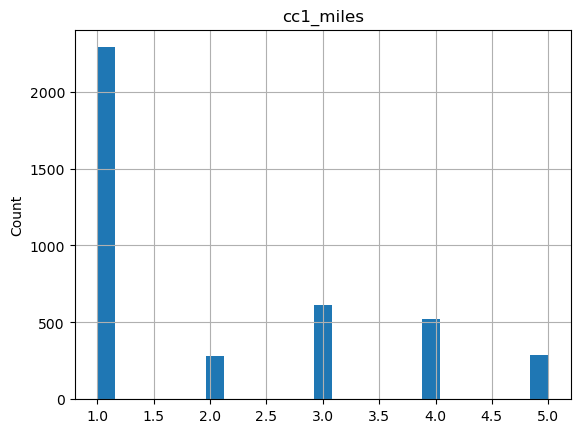

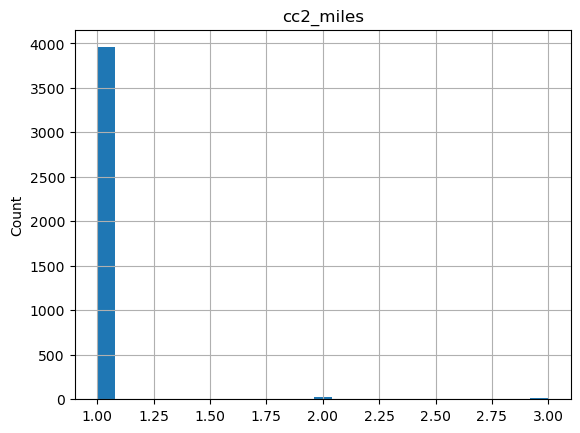

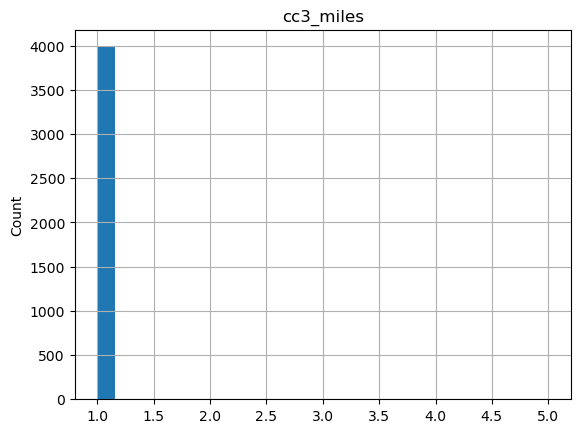

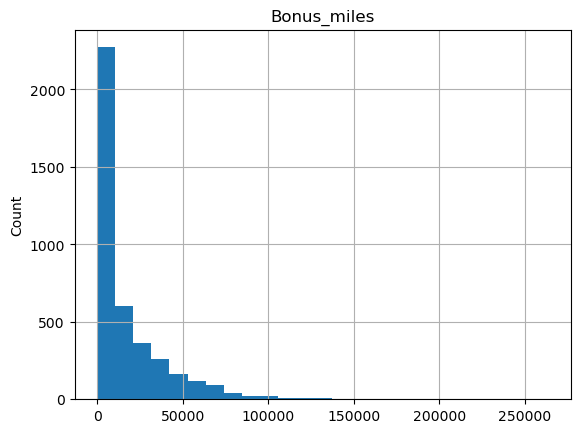

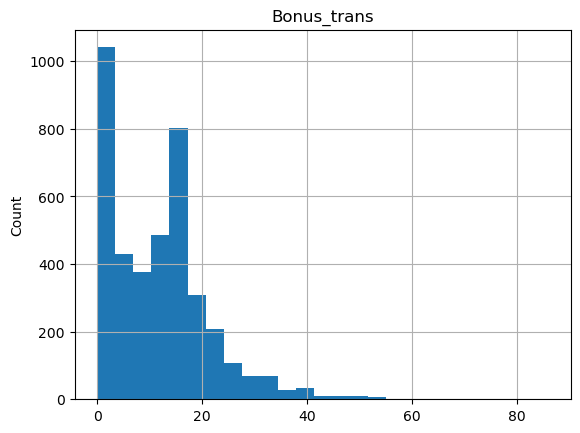

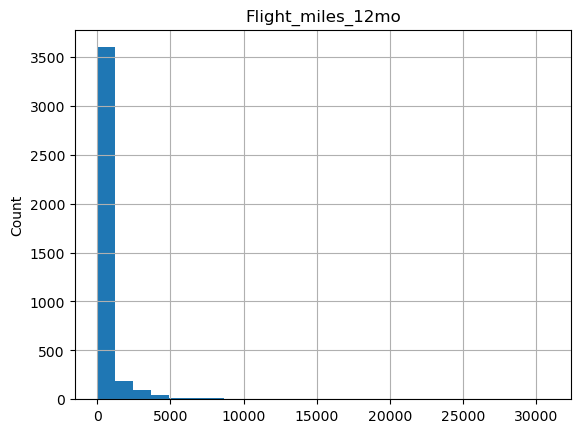

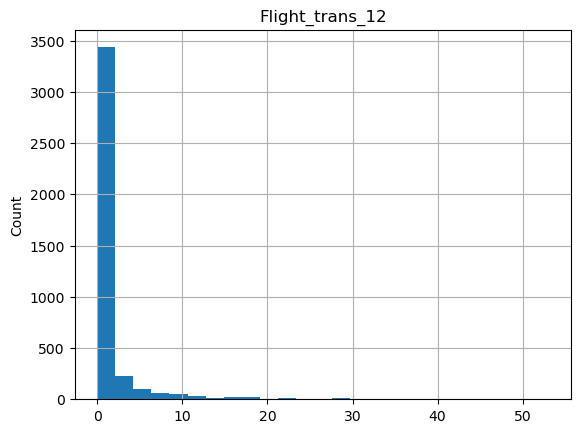

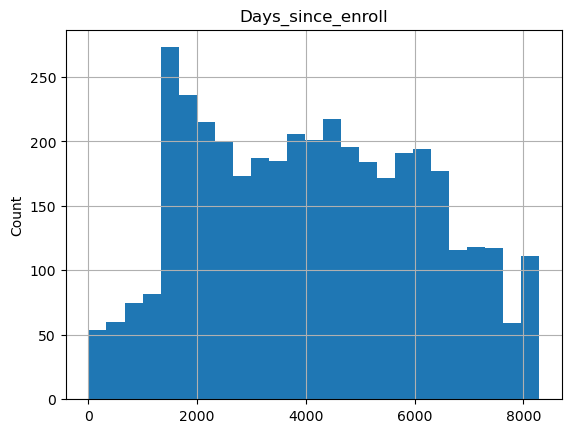

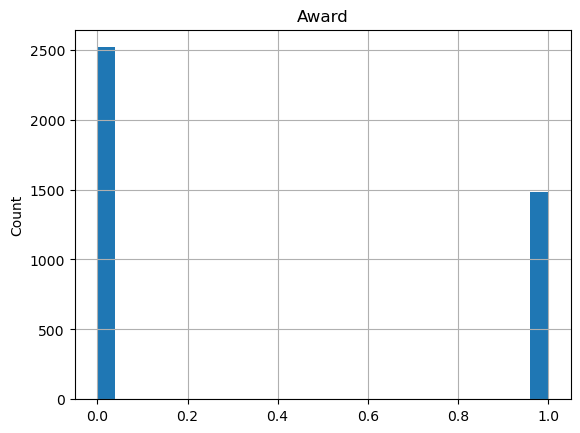

In [11]:
for feature in data.columns:
    data1 = data.copy()
    data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [12]:
data.columns

Index(['Id', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [13]:
from sklearn.preprocessing import normalize

In [14]:
data.drop(["Id"],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
data1=pd.DataFrame(normalize(data),columns=data.columns)
data

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
from scipy.cluster.hierarchy import linkage

In [17]:
z1 = linkage(data1, method="complete",metric="euclidean")

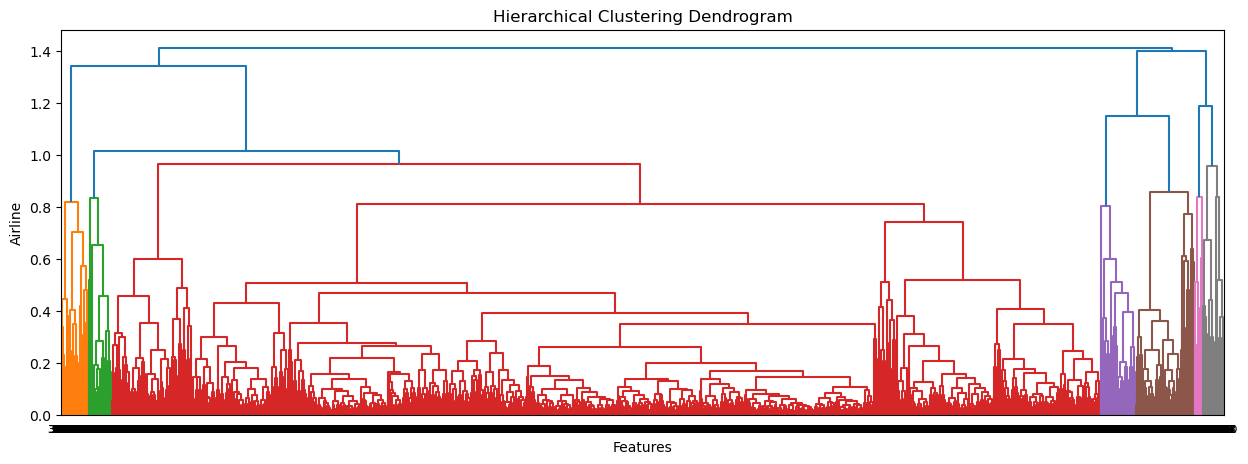

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Airline')
sch.dendrogram(z1,
    leaf_rotation=0.,  
    leaf_font_size=8.,  
)
plt.show()

In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
d1_norm = norm_func(data1.iloc[:,:])
d1_norm.head()

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000014,0.970448,0.0,0.097380,0.097380,0.097380,0.006006,0.007237,0.000000,0.000000,0.242041,0.000000
1,0.000078,0.940241,0.0,0.138682,0.138682,0.138682,0.010515,0.020507,0.000000,0.000000,0.341590,0.000000
2,0.000051,0.981147,0.0,0.066476,0.066476,0.066476,0.097921,0.019916,0.000000,0.000000,0.167187,0.000000
3,0.000227,0.904459,0.0,0.174169,0.174169,0.174169,0.030637,0.012846,0.000000,0.000000,0.427094,0.000000
4,0.000027,0.912258,0.0,0.105559,0.025126,0.025126,0.404507,0.050921,0.036692,0.007834,0.064526,0.040318


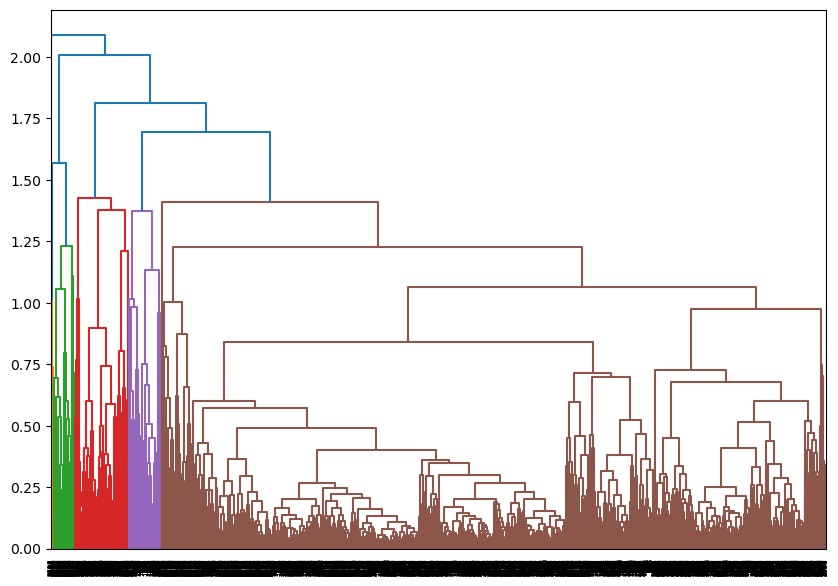

In [22]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(d1_norm, method='complete'))

In [24]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [25]:
y_hc = hc.fit_predict(d1_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [26]:
d1_norm['h_clusterid'] = Clusters

In [27]:
d1_norm

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.000014,0.970448,0.0,0.097380,0.097380,0.097380,0.006006,0.007237,0.000000,0.000000,0.242041,0.000000,2
1,0.000078,0.940241,0.0,0.138682,0.138682,0.138682,0.010515,0.020507,0.000000,0.000000,0.341590,0.000000,2
2,0.000051,0.981147,0.0,0.066476,0.066476,0.066476,0.097921,0.019916,0.000000,0.000000,0.167187,0.000000,2
3,0.000227,0.904459,0.0,0.174169,0.174169,0.174169,0.030637,0.012846,0.000000,0.000000,0.427094,0.000000,2
4,0.000027,0.912258,0.0,0.105559,0.025126,0.025126,0.404507,0.050921,0.036692,0.007834,0.064526,0.040318,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.195045,0.888769,0.0,0.136513,0.136513,0.136513,0.410508,0.040381,0.018212,0.010095,0.067310,0.207819,2
3995,0.062835,0.997744,0.0,0.042835,0.042835,0.042835,0.015218,0.016261,0.000000,0.000000,0.021216,0.066948,2
3996,0.052003,0.943724,0.0,0.108831,0.035154,0.035154,0.326639,0.021528,0.000000,0.000000,0.017558,0.055397,2
3997,0.073674,0.996959,0.0,0.050486,0.050486,0.050486,0.009089,0.003811,0.017188,0.003811,0.025058,0.000000,2


K-Means Clustering

In [29]:
Data_2=data1.copy()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Data_2.iloc[:,1:])

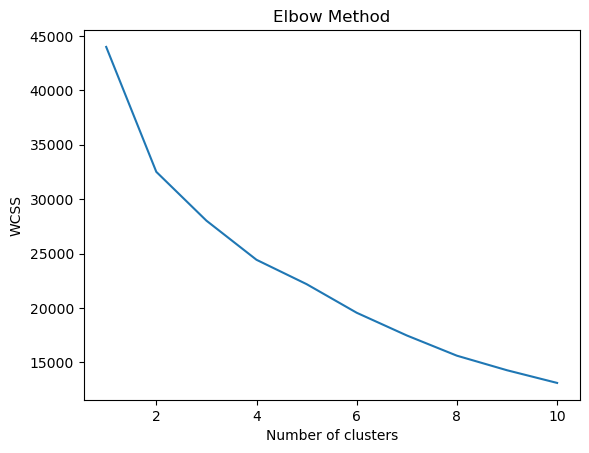

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [36]:
Data_2['clusterid_new'] = clusters_new.labels_

In [37]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [38]:
clusters_new.cluster_centers_

array([[-1.55397960e+00, -2.01745708e-02,  2.32367624e+00,
         2.56796104e+00,  2.59622751e+00, -4.32338729e-01,
         4.92253794e-01, -1.75502782e-01, -1.05560966e-01,
         2.03095597e+00,  5.10818420e-01],
       [ 4.50750216e-01, -2.59535234e-03, -4.16425882e-01,
        -3.17300227e-01, -3.17497963e-01, -3.46168496e-01,
        -3.00407321e-01, -9.58574952e-02, -7.64889590e-02,
        -2.56496458e-01, -2.30818555e-01],
       [-1.00546169e+00, -3.18231288e-03,  4.91720717e-01,
        -5.29301550e-02, -6.76465217e-02,  1.60272707e+00,
         8.52573106e-01, -4.23716701e-02, -3.21318409e-02,
        -2.98131543e-02,  6.21510238e-01],
       [-7.04823122e-01,  2.97693142e-01,  3.88348784e-01,
         4.88377160e-01,  4.99813031e-01,  6.53285739e-01,
         1.67053160e+00,  6.47829700e+00,  4.93102610e+00,
         5.19787733e-01,  8.56566030e-01]])

In [39]:
Data_2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.427204,0.592707,0.002367,0.000162,0.000161,0.000161,0.128133,0.000429,0.002916,0.000013,0.451992,0.000021
1,1,0.052562,0.965456,0.002749,0.000033,0.000024,0.000024,0.148773,0.000162,0.005126,0.000016,0.088804,0.000004
2,2,0.080939,0.695128,0.002744,0.000076,0.000036,0.000035,0.621326,0.000550,0.006585,0.000021,0.124481,0.000023
3,3,0.148332,0.750562,0.009315,0.000071,0.000062,0.000062,0.391390,0.000826,0.187231,0.000549,0.212030,0.000028


In [40]:
Data_2

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,1
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,1
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,1
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,1
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.193227,0.888739,0.0,0.000048,0.000048,0.000048,0.410072,0.000192,0.009620,0.000048,0.067488,0.000048,2
3995,0.062263,0.997710,0.0,0.000015,0.000015,0.000015,0.015202,0.000077,0.000000,0.000000,0.021617,0.000015,1
3996,0.051533,0.943692,0.0,0.000038,0.000013,0.000013,0.326292,0.000103,0.000000,0.000000,0.017977,0.000013,1
3997,0.073000,0.996925,0.0,0.000018,0.000018,0.000018,0.009080,0.000018,0.009080,0.000018,0.025441,0.000000,1


DBSCAN

In [42]:
Data_3=data1.copy()

In [43]:
Data_3.head()


,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [44]:
array=Data_3.values
array

array([[3.44815547e-05, 9.70414393e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00],
       [9.77144636e-05, 9.40208568e-01, 0.00000000e+00, ...,
        0.00000000e+00, 3.40437191e-01, 0.00000000e+00],
       [7.11742344e-05, 9.81113097e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       ...,
       [5.15333231e-02, 9.43691958e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.79770388e-02, 1.28224243e-05],
       [7.30001869e-02, 9.96924692e-01, 0.00000000e+00, ...,
        1.81592505e-05, 2.54411099e-02, 0.00000000e+00],
       [7.70720943e-01, 5.78088626e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.67960179e-01, 0.00000000e+00]])

In [45]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [46]:
dbscan = DBSCAN(eps=7,min_samples=12)
dbscan.fit(X)

DBSCAN(eps=7, min_samples=12)

In [47]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [48]:
cl


,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [49]:
pd.concat([Data_3,cl],axis=1)

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.193227,0.888739,0.0,0.000048,0.000048,0.000048,0.410072,0.000192,0.009620,0.000048,0.067488,0.000048,0
3995,0.062263,0.997710,0.0,0.000015,0.000015,0.000015,0.015202,0.000077,0.000000,0.000000,0.021617,0.000015,0
3996,0.051533,0.943692,0.0,0.000038,0.000013,0.000013,0.326292,0.000103,0.000000,0.000000,0.017977,0.000013,0
3997,0.073000,0.996925,0.0,0.000018,0.000018,0.000018,0.009080,0.000018,0.009080,0.000018,0.025441,0.000000,0
